In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')

from eboss_figs import (setup_color, plot_nz, mollweide, p0_demo, plot_overdensity,
                        nnbarchi2pdf_mocks_data, plot_deltaNqso, 
                        pcc_wnn_nchains,  plot_nstar, plot_linnn,
                        cellchi2pdf_mocks_data, plot_nsidexz, nbar_covmax, table_chi2methods,
                        p0mocks, dpvp)

In [4]:
fig_path = '/home/mehdi/data/eboss/figs/' # set path
plt.rc('font',**{'family':'sans-serif', 'size':15}) # set font
plt.rc('text', usetex=False)
setup_color() # set color and style

## redshift distribution n(z)

In [5]:
mkdir /home/mehdi/data/eboss/figs

mkdir: cannot create directory ‘/home/mehdi/data/eboss/figs’: File exists


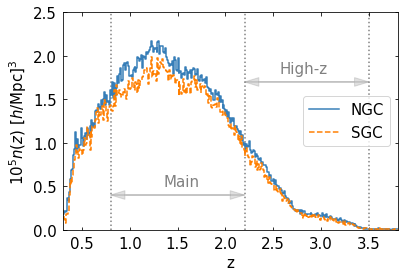

In [6]:
_ = plot_nz(fig_path + 'eboss_data_nz.pdf')

## Mollweide

column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:125: RuntimeWarning: invalid value encountered in true_divide
  ngal_dens = ngal_tot_f / (frac_tot_f * area_1pix)


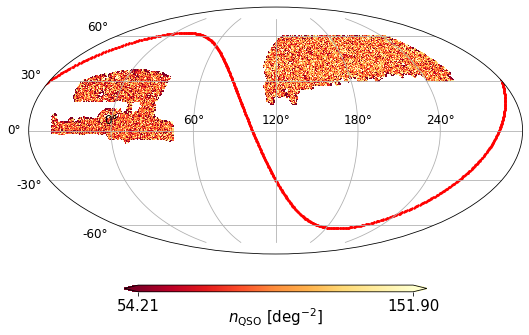

In [7]:
_ = mollweide(fig_path + 'eboss_nqso_mollweide.pdf')

/home/mehdi/data/eboss/data/v7_2/3.0/catalogs/


column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:183: RuntimeWarning: invalid value encountered in true_divide
  ngal_dens = ngal_tot / (frac_tot * pix_area)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:184: RuntimeWarning: invalid value encountered in true_divide
  ngal_dens_ = ngal_tot_ / (frac_tot_ * pix_area)


0.0 13.213747991494973


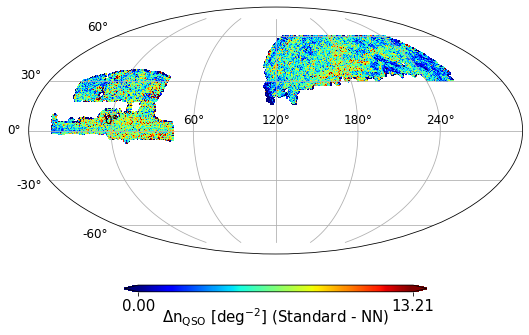

In [8]:
plot_deltaNqso(fig_path + 'eboss_dnqso_mollweide.pdf')

## power spectrum monopole

['/home/mehdi/data/eboss/theory/eBOSS_QSO_NGC_nnknown_512_cont_nnknown_512_kmin1_kmax64_fNL-10.dat', '/home/mehdi/data/eboss/theory/eBOSS_QSO_NGC_nnknown_512_cont_nnknown_512_kmin1_kmax64_fNL90.dat', '/home/mehdi/data/eboss/theory/eBOSS_QSO_NGC_nnknown_512_cont_nnknown_512_kmin1_kmax64_fNL0.dat']


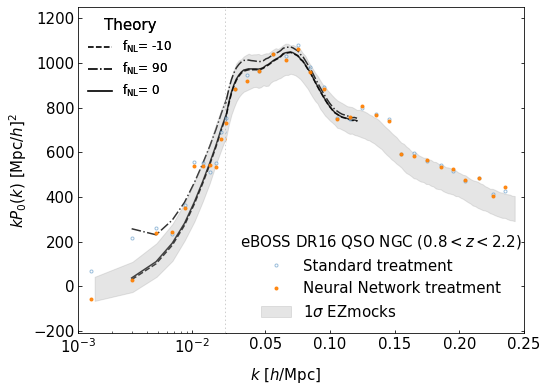

In [9]:
p0_demo(fig_path + 'p0_ngc_main.pdf', cap='NGC', show_nn=True, sample='main')

['/home/mehdi/data/eboss/theory/eBOSS_QSO_SGC_nnknown_512_cont_nnknown_512_kmin1_kmax64_fNL0.dat', '/home/mehdi/data/eboss/theory/eBOSS_QSO_SGC_nnknown_512_cont_nnknown_512_kmin1_kmax64_fNL90.dat', '/home/mehdi/data/eboss/theory/eBOSS_QSO_SGC_nnknown_512_cont_nnknown_512_kmin1_kmax64_fNL-10.dat']


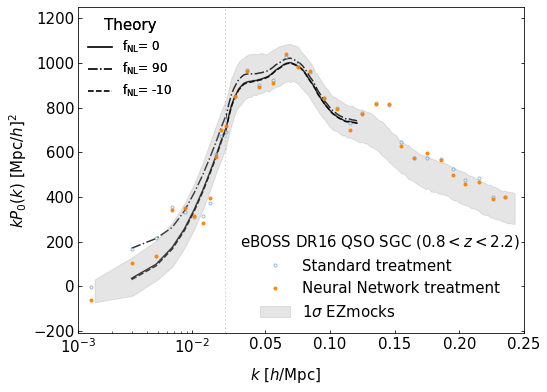

In [10]:
p0_demo(fig_path + 'p0_sgc_main.pdf', cap='SGC', show_nn=True, sample='main')

In [11]:
# p0_demo(fig_path + 'p0_ngc_main_wonn.pdf', cap='NGC', show_nn=False, sample='main')
# p0_demo(fig_path + 'p0_ngc_highz_all.pdf', cap='NGC', show_nn=True, sample='highz', method='all')
# p0_demo(fig_path + 'p0_sgc_highz.pdf', cap='SGC', show_nn=True, sample='highz')

## Density Contrast

nmocks: 1000
nmocks: 999
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8


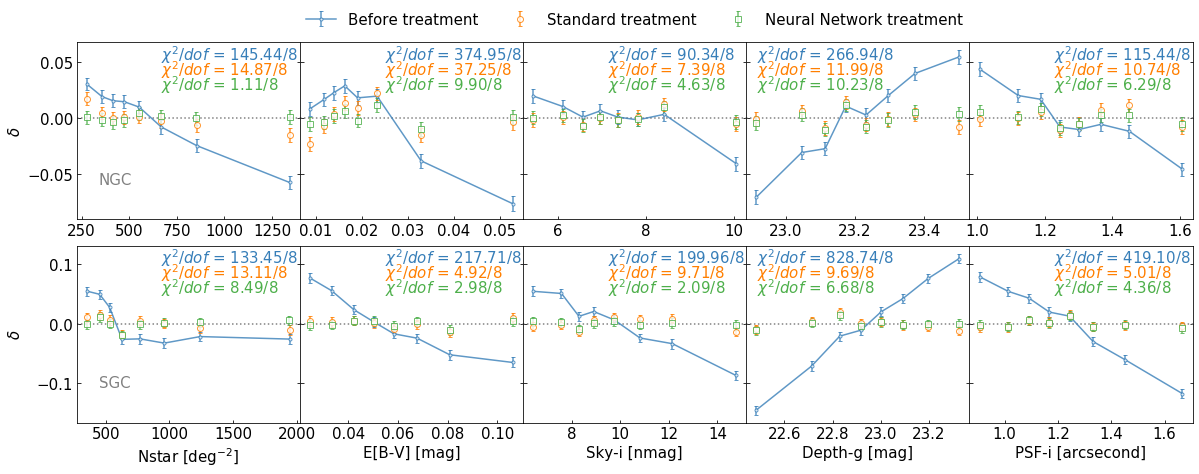

In [12]:
plot_overdensity(fig_path + 'nnbar_main_known.pdf', 'main')

In [13]:
#plot_overdensity(fig_path + 'nnbar_highz_known.pdf', 'highz')

## cov matrix from nbar mocks

len(nbars): 1000 NGC
(1000, 136)


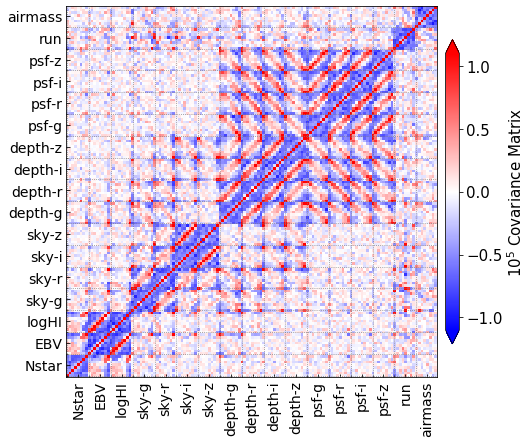

In [14]:
nbar_covmax(fig_path + 'nnbar_covmax_ngc_512.pdf')

## chi2 pdf from null mocks vs data

### add 16% and 84%

len(nbars): 1000 NGC
(1000, 136)
1000
len(nbars): 1000 NGC
(1000, 136)
1000
len(nbars): 1000 NGC
(1000, 136)
1000
len(nbars): 1000 NGC
(1000, 136)
1000
len(nbars): 1000 NGC
(1000, 136)
1000
[ 84.58763802  97.31553868 108.28972291 177.96376151 196.78848032
 231.86760459]
{'Data before treatment': 1344.911422172292, 'Data after Standard': 218.09021080225233, 'Data after NN': 151.7138535409963}
141.0 +- 21.1
7.383264985528251
Null (Truth) 84.58763802249814 231.86760458516073
Null after NN 88.58478451832798 211.14390253772194
Cont 238.8000108098504 524.5121485318145
Cont after NN 62.55559035281294 250.66246900430497
Cont after Standard 68.28547811508633 226.99803027828966


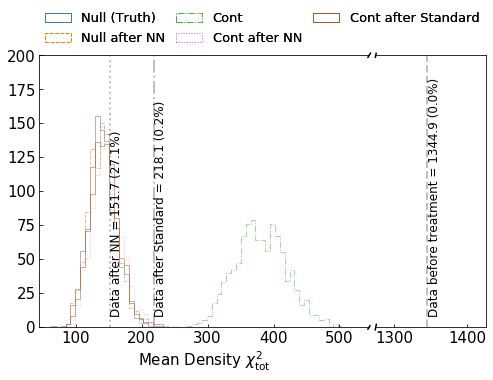

In [10]:
nnbarchi2pdf_mocks_data(fig_path + 'nnbar_chi2pdf_ngc_main.pdf', 
                        cap='NGC', 
                        xlim1=(45., 545), # 500
                        xlim2=(1275, 1425), # 150
                        xticks2=[1300, 1400], # 100
                       add_text=True)

len(nbars): 999 SGC
(999, 136)
999
len(nbars): 999 SGC
(999, 136)
999
len(nbars): 999 SGC
(999, 136)
999
len(nbars): 999 SGC
(999, 136)
999
len(nbars): 999 SGC
(999, 136)
999
[ 82.61783209  96.65862648 106.99252151 179.16389599 198.78387793
 248.19016994]
{'Data before treatment': 1942.9844934798894, 'Data after Standard': 132.48903446489112, 'Data after NN': 116.30953639855215}
141.4 +- 22.0
7.687665387627926
Null (Truth) 82.61783209315551 248.1901699383743
Null after NN 82.64332572196417 216.05685099335915
Cont 640.9719701377617 1017.4351734612537
Cont after NN 95.05956153519764 247.82340226769577
Cont after Standard 96.9373211158188 252.33683574089082


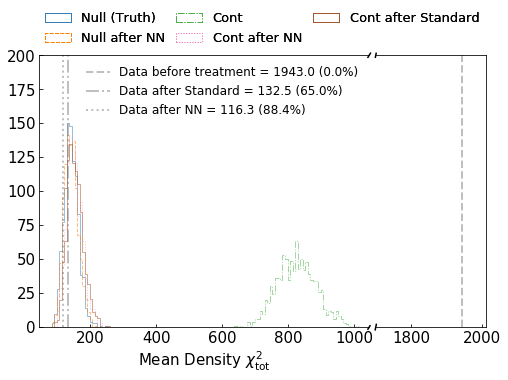

In [11]:
nnbarchi2pdf_mocks_data(fig_path + 'nnbar_chi2pdf_sgc_main.pdf', 
                        cap='SGC', 
                        xlim1=(45., 1045), # 1000
                        xlim2=(1700, 2010), # 310
                        xticks2=[1800, 2000], # 100
                       add_text=False)

# Cross power

ell= [ 1.625       4.14814815  8.82407407 19.95726496]
1000
[   3.04366273    8.12090232   14.63299217  185.81685854  344.46738622
 2295.03015916]
1000
[  4.11621989   7.67905288  15.56046624 192.01335611 313.41146926
 548.33691714]
1000
[ 25.76780131  44.89261368  59.34581698 181.51339523 224.09359286
 416.33153175]
1000
[  3.6692582   12.82102316  20.97213247 181.92990256 283.50046146
 382.92248802]
1000
[  5.38228599  11.00759133  18.37920456 185.90246834 298.95560459
 479.60417665]
{'Data before treatment': 211839.38520639602, 'Data after Standard': 338.5487416037387, 'Data after NN': 49.76468377364251}
78.7 +- 97.4
34.08759641775017
Null (Truth) 3.0436627309462403 2295.0301591629536
Null after NN 4.116219891193523 548.3369171380523
Cont 25.76780131036554 416.33153175255023
Cont after NN 3.6692582003635748 382.9224880223451
Cont after Standard 5.382285992176096 479.60417665360694


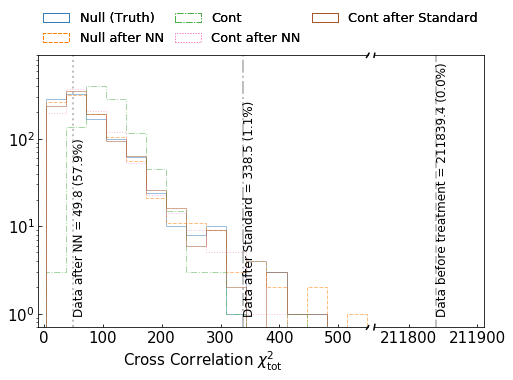

In [5]:
cellchi2pdf_mocks_data(fig_path + 'cell_chi2pdf_ngc_main.pdf', 
                        cap='NGC', 
                        xlim1=(-10., 550.), # 560
                        xlim2=(211750, 211910), # 160
                        xticks2=[211800, 211900],
                        add_text=True) # 100

ell= [ 1.625       4.14814815  8.82407407 19.95726496]
999
[   3.00509505    7.63111631   14.00207175  202.54445906  379.23925462
 1135.18345963]
999
[  2.89882819   6.10486218  13.66519772 198.63676324 337.47129618
 668.74634651]
999
[ 71.33089205  92.67193554 106.81616473 233.84944192 279.48297272
 316.63446291]
999
[  3.72833018  10.97011334  22.08094327 185.99623961 257.32960331
 414.29457157]
999
[  5.56238797  10.84098162  19.05573807 185.35582902 283.08398207
 637.75054125]
{'Data before treatment': 235587.56305221142, 'Data after Standard': 404.2851255971073, 'Data after NN': 53.24587249975448}
78.1 +- 81.6
28.581035401315297
Null (Truth) 3.005095047694812 1135.1834596340248
Null after NN 2.8988281903913706 668.7463465088888
Cont 71.33089205414802 316.6344629105627
Cont after NN 3.728330176170801 414.2945715692357
Cont after Standard 5.562387965882695 637.7505412450392


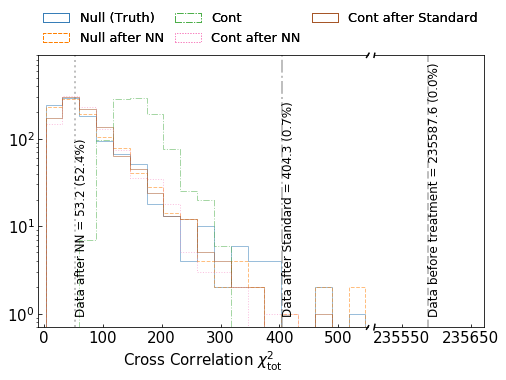

In [6]:
cellchi2pdf_mocks_data(fig_path + 'cell_chi2pdf_sgc_main.pdf', 
                        cap='SGC', 
                        xlim1=(-10., 550.), # 560
                        xlim2=(235510, 235670), # 160
                        xticks2=[235550, 235650], add_text=True) # 100

# Impact of nstar

nmocks: 1000
nbins: 8


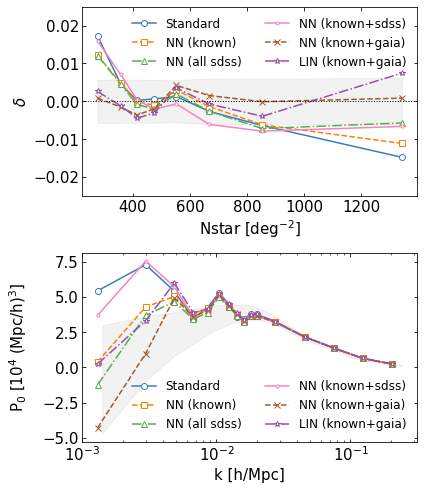

In [19]:
plot_nstar(fig_path + 'eboss_512_nbarnstar_ngc.pdf')

# NN/Linear methods

nmocks: 1000
nbins: 8


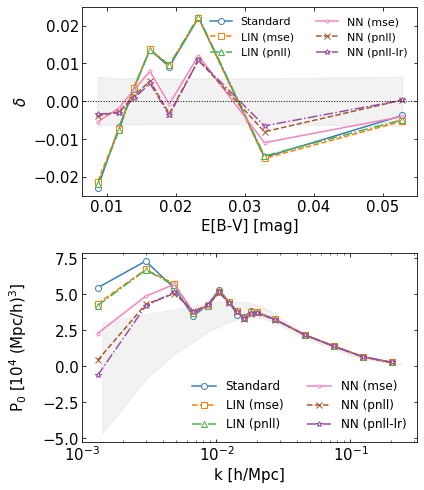

In [20]:
plot_linnn(fig_path + 'eboss_512_nbarlinnn_ngc.pdf')

nmocks: 1000
nbins: 8


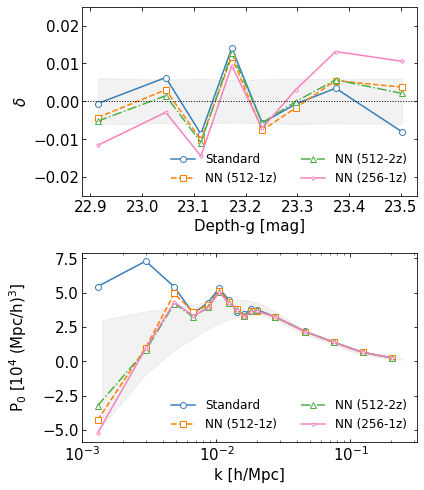

In [26]:
plot_nsidexz(fig_path + 'eboss_512_nbarzsplit_ngc.pdf')

## Table of chi2

In [22]:
table_chi2methods()

len(nbars): 1000 NGC
(1000, 136)
1000
[ 84.58763802  97.31553868 108.28972291 177.96376151 196.78848032
 231.86760459]
noweight, 1344.9114
standard, 218.0902
NN 512-1z, 151.7139
NN 512-2z, 165.4911
NN 256-1z, 217.5827
lin-mse, 213.5095
lin-pnll, 210.2262
nn-mse, 194.5648
nn-pnll, 163.9677
nn-pnll-wocos, 168.9919
nn-pnll-all, 153.9256
nn-known+gaia, 151.7139
nn-known+sdss, 184.5972
lin-known+gaia, 196.8593


## P0 of mocks

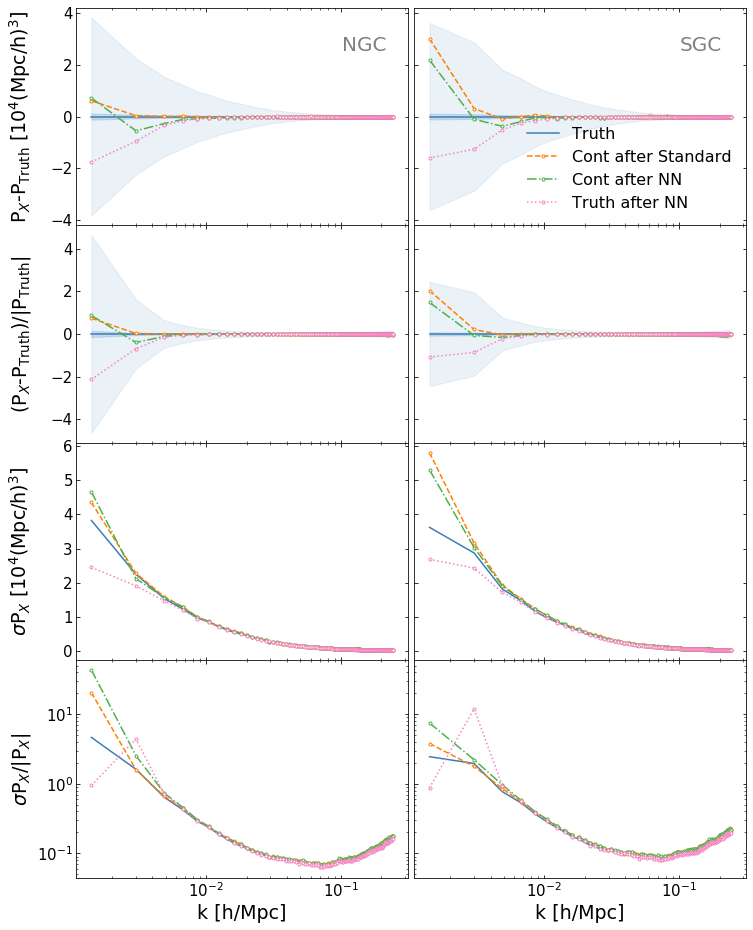

In [23]:
p0mocks(fig_path + 'ezmocks_512known.pdf')

# Mitigation bias

100%|██████████| 1000/1000 [00:03<00:00, 270.25it/s]


0.0014085807875494757 -0.8583716565983551 -10544.547016180772
0.0030163614591330397 -0.4132315168609339 -768.5757472052852
0.0048942687912127796 -0.2787485301142734 3230.327699732783
0.006745221186903896 -0.22284883075736545 5064.150510393112


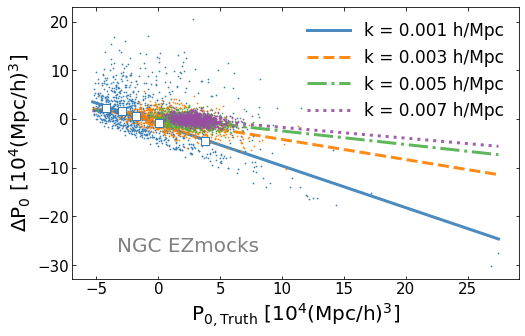

In [24]:
dpvp(fig_path + 'eboss_512_dpvsp_ngc.pdf')

## Convergence

4


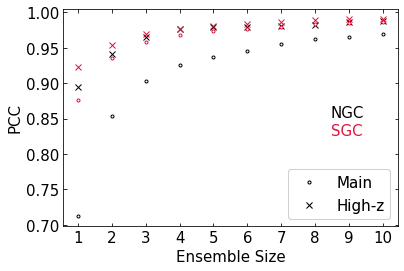

In [25]:
_ = pcc_wnn_nchains(fig_path + 'eboss_512_pccwnn_epoch.pdf', ns='512')